In [3]:
import os
import random
import string

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchvision
import tqdm
from PIL import Image
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms

In [4]:
PATH_TO_DATASET = os.path.join(".", "dataset")
PATH_TO_CAPTIONS = os.path.join(PATH_TO_DATASET, "captions.txt")
PATH_TO_IMAGES_FOLDER = os.path.join(PATH_TO_DATASET, "Images")

In [5]:
df = pd.read_csv(PATH_TO_CAPTIONS)
df.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [6]:
df.isnull().sum()

image      0
caption    0
dtype: int64

In [7]:
len(df)

40455

In [8]:
grouped_df = df.groupby("image")["caption"].apply(list)
grouped_df.head()

image
1000268201_693b08cb0e.jpg    [A child in a pink dress is climbing up a set ...
1001773457_577c3a7d70.jpg    [A black dog and a spotted dog are fighting, A...
1002674143_1b742ab4b8.jpg    [A little girl covered in paint sits in front ...
1003163366_44323f5815.jpg    [A man lays on a bench while his dog sits by h...
1007129816_e794419615.jpg    [A man in an orange hat starring at something ...
Name: caption, dtype: object

In [9]:
df.head(10)

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [10]:
grouped_df = grouped_df.reset_index()
grouped_df.rename(columns={"caption": "captions"}, inplace=True)

grouped_df["path"] = PATH_TO_IMAGES_FOLDER + os.sep + grouped_df["image"].astype(str)
grouped_df.head(10)

,image,captions,path
0,1000268201_693b08cb0e.jpg,[A child in a pink dress is climbing up a set ...,.\dataset\Images\1000268201_693b08cb0e.jpg
1,1001773457_577c3a7d70.jpg,"[A black dog and a spotted dog are fighting, A...",.\dataset\Images\1001773457_577c3a7d70.jpg
2,1002674143_1b742ab4b8.jpg,[A little girl covered in paint sits in front ...,.\dataset\Images\1002674143_1b742ab4b8.jpg
3,1003163366_44323f5815.jpg,[A man lays on a bench while his dog sits by h...,.\dataset\Images\1003163366_44323f5815.jpg
4,1007129816_e794419615.jpg,[A man in an orange hat starring at something ...,.\dataset\Images\1007129816_e794419615.jpg
5,1007320043_627395c3d8.jpg,"[A child playing on a rope net ., A little gir...",.\dataset\Images\1007320043_627395c3d8.jpg
6,1009434119_febe49276a.jpg,[A black and white dog is running in a grassy ...,.\dataset\Images\1009434119_febe49276a.jpg
7,1012212859_01547e3f17.jpg,"[A dog shakes its head near the shore , a red ...",.\dataset\Images\1012212859_01547e3f17.jpg
8,1015118661_980735411b.jpg,[A boy smiles in front of a stony wall in a ci...,.\dataset\Images\1015118661_980735411b.jpg
9,1015584366_dfcec3c85a.jpg,"[A black dog leaps over a log ., A grey dog is...",.\dataset\Images\1015584366_dfcec3c85a.jpg


In [11]:
def plot_sample_image(df_grouped, sample_row_idx=42):
    sample_row_idx = 42
    sample_image_name = df_grouped.iloc[sample_row_idx]["image"]
    sample_image_captions = df_grouped.iloc[sample_row_idx]["captions"]
    sample_image_path = df_grouped.iloc[sample_row_idx]["path"]

    img = mpimg.imread(sample_image_path)

    plt.imshow(img)
    plt.title(sample_image_name, fontsize=12)
    plt.xlabel("\n".join(sample_image_captions), fontsize=8)
    plt.show()

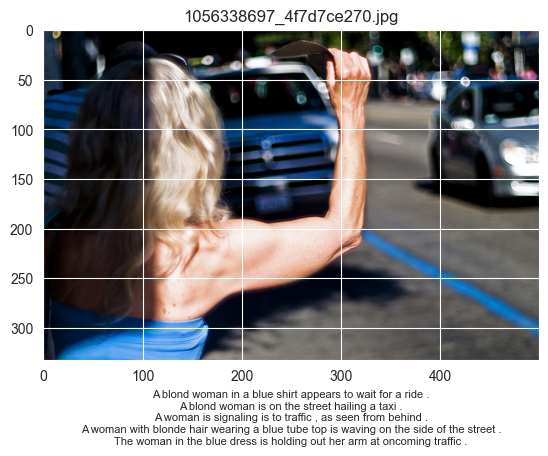

In [12]:
plot_sample_image(grouped_df)

## Data preprocessing

In [13]:
df["preprocessed_caption"] = df["caption"].apply(lambda c: c.lower())
df["preprocessed_caption"] = df["preprocessed_caption"].apply(lambda c: c.translate(str.maketrans("", "", string.punctuation)))
df["preprocessed_caption"] = df["preprocessed_caption"].apply(lambda c: c.replace("\s+", " "))
df["preprocessed_caption"] = df["preprocessed_caption"].apply(lambda c: c.strip())
df["preprocessed_caption"] = "<start> " + df["preprocessed_caption"] + " <end>"

In [14]:
tokenized_captions = df["preprocessed_caption"].apply(lambda c: c.split())
MAX_SENTENCE_LENGTH = max(tokenized_captions.apply(len))
MAX_SENTENCE_LENGTH

38

In [15]:
tokenized_captions = tokenized_captions.apply(lambda tokens: tokens + ["<pad>"] * (MAX_SENTENCE_LENGTH - len(tokens)))
df["preprocessed_caption"] = tokenized_captions.apply(lambda tokens: " ".join(tokens))
df["preprocessed_caption"].head(10)

0    <start> a child in a pink dress is climbing up...
1    <start> a girl going into a wooden building <e...
2    <start> a little girl climbing into a wooden p...
3    <start> a little girl climbing the stairs to h...
4    <start> a little girl in a pink dress going in...
5    <start> a black dog and a spotted dog are figh...
6    <start> a black dog and a tricolored dog playi...
7    <start> a black dog and a white dog with brown...
8    <start> two dogs of different breeds looking a...
9    <start> two dogs on pavement moving toward eac...
Name: preprocessed_caption, dtype: object

In [16]:
class Vocabulary:
    def __init__(self, tokenized_captions):
        self.tokenized_captions = tokenized_captions
        self.start_sentence_token = "<start>"
        self.end_sentence_token = "<end>"
        self.padding_token = "<pad>"
        self.special_tokens = [self.start_sentence_token, self.end_sentence_token, self.padding_token]
        self.token2idx = {
            self.padding_token: 0,
            self.start_sentence_token: 1,
            self.end_sentence_token: 2,
        }
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
        
        unique_tokens = sorted(set(
            token for caption in tokenized_captions for token in caption
            if token not in self.special_tokens
        ))
        
        for idx, token in enumerate(unique_tokens, start=len(self.special_tokens)):
            self.token2idx[token] = idx
            self.idx2token[idx] = token

    def map_to_indices(self, caption_tokens):
         return [self.token2idx[token] for token in caption_tokens if token in self.token2idx]
    
    def map_to_tokens(self, tokens_indices):
        return [self.idx2token[idx] for idx in tokens_indices if idx in self.idx2token]
    
    def __len__(self):
        return len(self.token2idx)
    
    def get_end_sentence_token(self):
        return self.end_sentence_token
    
    def map_to_token(self, idx):
        return self.idx2token[idx]
    
    def is_end_sentence_token_idx(self, idx):
        return self.map_to_token(idx) == self.end_sentence_token
    
    def get_padding_token_idx(self):
        return self.token2idx[self.padding_token]
    
    def get_pretty_caption(self, tokens):
        return " ".join(filter(lambda t: t not in self.special_tokens, tokens))

In [17]:
vocabulary = Vocabulary(tokenized_captions)

In [18]:
len(vocabulary)

8831

In [19]:
# Just to test vocabulary

sample_tokens_indices = vocabulary.map_to_indices(["<start>", "<end>", "<pad>", "woman"])
print(f"Sample tokens indices: {sample_tokens_indices}")

sample_tokens_from_vocabulary = vocabulary.map_to_tokens(sample_tokens_indices)
print(f"Sample tokens retrieved by indices: {sample_tokens_from_vocabulary}")

Sample tokens indices: [1, 2, 0, 8701]
Sample tokens retrieved by indices: ['<start>', '<end>', '<pad>', 'woman']


In [20]:
df["encoded_caption"] = df["preprocessed_caption"].apply(lambda c: vocabulary.map_to_indices(c.split()))
df["encoded_caption"].head(10)

0    [1, 54, 1462, 3878, 54, 5595, 2361, 3970, 1567...
1    [1, 54, 3242, 3299, 3952, 54, 8707, 1089, 2, 0...
2    [1, 54, 4399, 3242, 1567, 3952, 54, 8707, 5662...
3    [1, 54, 4399, 3242, 1567, 7841, 7325, 7945, 36...
4    [1, 54, 4399, 3242, 3878, 54, 5595, 2361, 3299...
5    [1, 54, 781, 2276, 245, 54, 7255, 2276, 326, 2...
6    [1, 54, 781, 2276, 245, 54, 8097, 2276, 5663, ...
7    [1, 54, 781, 2276, 245, 54, 8597, 2276, 8687, ...
8    [1, 8204, 2280, 5086, 2170, 994, 4457, 393, 24...
9    [1, 8204, 2280, 5116, 5415, 4855, 8012, 2442, ...
Name: encoded_caption, dtype: object

In [21]:
df["image_path"] = PATH_TO_IMAGES_FOLDER + os.sep + df["image"].astype(str)
df.head()

,image,caption,preprocessed_caption,encoded_caption,image_path
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...,<start> a child in a pink dress is climbing up...,"[1, 54, 1462, 3878, 54, 5595, 2361, 3970, 1567...",.\dataset\Images\1000268201_693b08cb0e.jpg
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .,<start> a girl going into a wooden building <e...,"[1, 54, 3242, 3299, 3952, 54, 8707, 1089, 2, 0...",.\dataset\Images\1000268201_693b08cb0e.jpg
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .,<start> a little girl climbing into a wooden p...,"[1, 54, 4399, 3242, 1567, 3952, 54, 8707, 5662...",.\dataset\Images\1000268201_693b08cb0e.jpg
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...,<start> a little girl climbing the stairs to h...,"[1, 54, 4399, 3242, 1567, 7841, 7325, 7945, 36...",.\dataset\Images\1000268201_693b08cb0e.jpg
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...,<start> a little girl in a pink dress going in...,"[1, 54, 4399, 3242, 3878, 54, 5595, 2361, 3299...",.\dataset\Images\1000268201_693b08cb0e.jpg


In [79]:
class Flickr8kDataset(torch.utils.data.Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_path = row["image_path"]
        caption = row["encoded_caption"]
        
        image = Image.open(image_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
            
        return image, torch.tensor(caption)

In [80]:
class Flickr8kDataModule:
    def __init__(
        self, 
        df, 
        batch_size=16,
        num_workers=0,
        train_test_split=0.8,
        random_seed=42
    ):
        super(Flickr8kDataModule, self).__init__()
        self.df = df
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.train_test_split = train_test_split
        self.random_seed = random_seed
        
    def setup(self):
        images = list(set(self.df["image"]))
        n_images_total = len(images)
        
        randomizer = random.Random(self.random_seed) 
        randomizer.shuffle(images)
        
        split_idx = int(n_images_total * self.train_test_split)
        train_images = images[:split_idx]
        test_images = images[split_idx:]

        train_transforms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        test_transforms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        
        target_transforms = transforms.ToTensor()
        
        self.train_df = self.df[self.df["image"].isin(train_images)]
        self.test_df = self.df[self.df["image"].isin(test_images)]
        
        self.train_dataset = Flickr8kDataset(self.train_df, train_transforms)
        self.test_dataset = Flickr8kDataset(self.test_df, test_transforms)
        
    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True,
            num_workers=self.num_workers,
            pin_memory=True
        )
    
    def val_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,
            num_workers=self.num_workers
        )

In [81]:
class EncoderCNN(nn.Module):
    def __init__(self, embeddings_size):
        super(EncoderCNN, self).__init__()
        resnet = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.IMAGENET1K_V1)
        for param in resnet.parameters():
            param.requires_grad = False
    
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embeddings_size)
        
    def forward(self, samples):
        features = self.resnet(samples)
        features = features.view(features.size(0), -1)
        features = self.embed(features)
        
        return features

In [82]:
class DecoderLSTM(nn.Module):
    def __init__(self, embedding_size, hidden_size, vocabulary_size=len(vocabulary), n_lstm_layers=1):
        super(DecoderLSTM, self).__init__()
        self.embedding = nn.Embedding(vocabulary_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers=n_lstm_layers, batch_first=True)
        self.fcn = nn.Linear(hidden_size, vocabulary_size)
        
    def forward(self, samples, captions):
        embeds = self.embedding(captions[:, :-1])
        x = torch.cat((samples.unsqueeze(1), embeds), dim=1)
        x, _ = self.lstm(x)
        x = self.fcn(x)

        return x
        
    def predict_caption(self, inputs, max_caption_len=MAX_SENTENCE_LENGTH):
        captions_idx = []
        batch_size = inputs.size(0)
        hidden = None

        for _ in range(max_caption_len):
            output, hidden = self.lstm(inputs, hidden)
            output = self.fcn(output)
            output = output.view(batch_size, -1)
            
            predicted_word_idx = output.argmax(dim=1)
            captions_idx.append(predicted_word_idx.item())
            
            if vocabulary.is_end_sentence_token_idx(predicted_word_idx.item()):
                break
                
            inputs = self.embedding(predicted_word_idx.unsqueeze(0))
            
        return captions_idx

In [83]:
class EncoderDecoder(nn.Module):
    def __init__(self, embedding_size, hidden_size, vocabulary_size=len(vocabulary), n_lstm_layers=1):
        super(EncoderDecoder, self).__init__()
        self.encoder = EncoderCNN(embedding_size)
        self.decoder = DecoderLSTM(embedding_size, hidden_size, vocabulary_size, n_lstm_layers)
        self.criterion = nn.CrossEntropyLoss()
    
    def forward(self, images, captions):
        features = self.encoder(images)
        outputs = self.decoder(features, captions)
        
        return outputs

In [84]:
n_epochs=15
embedding_size=128
hidden_size=256
learning_rate=1e-3

In [51]:
data_module = Flickr8kDataModule(df)
data_module.setup()

In [52]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

In [85]:
model = EncoderDecoder(embedding_size, hidden_size).to(DEVICE)

In [31]:
criterion = nn.CrossEntropyLoss(ignore_index=vocabulary.get_padding_token_idx())
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [32]:
train_dataloader = data_module.train_dataloader()

In [31]:
n_log_every_batch = 400

for epoch in tqdm.tqdm(range(1, n_epochs + 1)):
    print(f"Started epoch: {epoch}")
    
    epoch_loss = 0
    n_batches = 0
    
    for idx, (image, captions) in (enumerate(iter(train_dataloader))):
        image, captions = image.to(DEVICE), captions.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(image, captions)
        loss = criterion(outputs.view(-1, len(vocabulary)), captions.view(-1))
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
        if (idx + 1) % n_log_every_batch == 0:
            print(f"Epoch: {epoch}, batch: {idx + 1}, loss: {loss.item():.4f}")
            
        n_batches += 1
        
    print(f"Finished epoch: {epoch}. Average loss: {epoch_loss / n_batches}")

  0%|          | 0/15 [00:00<?, ?it/s]

Started epoch: 1
Epoch: 1, batch: 400, loss: 3.8852
Epoch: 1, batch: 800, loss: 3.4973
Epoch: 1, batch: 1200, loss: 3.4069
Epoch: 1, batch: 1600, loss: 3.2946
Epoch: 1, batch: 2000, loss: 3.0743


  7%|▋         | 1/15 [04:18<1:00:25, 258.97s/it]

Finished epoch: 1. Average loss: 3.646339131886571
Started epoch: 2
Epoch: 2, batch: 400, loss: 3.1550
Epoch: 2, batch: 800, loss: 2.9626
Epoch: 2, batch: 1200, loss: 3.2088
Epoch: 2, batch: 1600, loss: 2.7807
Epoch: 2, batch: 2000, loss: 2.7343


 13%|█▎        | 2/15 [08:34<55:43, 257.22s/it]  

Finished epoch: 2. Average loss: 2.965071118237415
Started epoch: 3
Epoch: 3, batch: 400, loss: 2.3740
Epoch: 3, batch: 800, loss: 2.8588
Epoch: 3, batch: 1200, loss: 2.8824
Epoch: 3, batch: 1600, loss: 2.3389
Epoch: 3, batch: 2000, loss: 2.2955


 20%|██        | 3/15 [12:50<51:17, 256.48s/it]

Finished epoch: 3. Average loss: 2.6935387673616056
Started epoch: 4
Epoch: 4, batch: 400, loss: 2.7439
Epoch: 4, batch: 800, loss: 2.5296
Epoch: 4, batch: 1200, loss: 2.6665
Epoch: 4, batch: 1600, loss: 2.4165
Epoch: 4, batch: 2000, loss: 2.4102


 27%|██▋       | 4/15 [17:11<47:18, 258.06s/it]

Finished epoch: 4. Average loss: 2.502431752654626
Started epoch: 5
Epoch: 5, batch: 400, loss: 2.3994
Epoch: 5, batch: 800, loss: 2.3540
Epoch: 5, batch: 1200, loss: 2.3124
Epoch: 5, batch: 1600, loss: 2.5154
Epoch: 5, batch: 2000, loss: 2.2845


 33%|███▎      | 5/15 [21:27<42:54, 257.48s/it]

Finished epoch: 5. Average loss: 2.350450470903635
Started epoch: 6
Epoch: 6, batch: 400, loss: 2.2244
Epoch: 6, batch: 800, loss: 2.1835
Epoch: 6, batch: 1200, loss: 2.4902
Epoch: 6, batch: 1600, loss: 2.3202
Epoch: 6, batch: 2000, loss: 2.3013


 40%|████      | 6/15 [25:43<38:32, 256.89s/it]

Finished epoch: 6. Average loss: 2.2250699944503225
Started epoch: 7
Epoch: 7, batch: 400, loss: 2.0649
Epoch: 7, batch: 800, loss: 2.1395
Epoch: 7, batch: 1200, loss: 2.0167
Epoch: 7, batch: 1600, loss: 2.0292
Epoch: 7, batch: 2000, loss: 2.2465


 47%|████▋     | 7/15 [29:58<34:12, 256.50s/it]

Finished epoch: 7. Average loss: 2.1129761291386995
Started epoch: 8
Epoch: 8, batch: 400, loss: 2.0564
Epoch: 8, batch: 800, loss: 2.0550
Epoch: 8, batch: 1200, loss: 1.9923
Epoch: 8, batch: 1600, loss: 2.0948
Epoch: 8, batch: 2000, loss: 2.0437


 53%|█████▎    | 8/15 [34:14<29:54, 256.36s/it]

Finished epoch: 8. Average loss: 2.018320292514324
Started epoch: 9
Epoch: 9, batch: 400, loss: 1.7306
Epoch: 9, batch: 800, loss: 1.8987
Epoch: 9, batch: 1200, loss: 2.1225
Epoch: 9, batch: 1600, loss: 1.9254
Epoch: 9, batch: 2000, loss: 2.1345


 60%|██████    | 9/15 [38:30<25:36, 256.11s/it]

Finished epoch: 9. Average loss: 1.9343070504810336
Started epoch: 10
Epoch: 10, batch: 400, loss: 1.7328
Epoch: 10, batch: 800, loss: 1.8064
Epoch: 10, batch: 1200, loss: 1.8714
Epoch: 10, batch: 1600, loss: 1.9333
Epoch: 10, batch: 2000, loss: 1.9189


 67%|██████▋   | 10/15 [42:47<21:21, 256.29s/it]

Finished epoch: 10. Average loss: 1.861193360577582
Started epoch: 11
Epoch: 11, batch: 400, loss: 1.8436
Epoch: 11, batch: 800, loss: 1.8982
Epoch: 11, batch: 1200, loss: 1.9162
Epoch: 11, batch: 1600, loss: 1.6619
Epoch: 11, batch: 2000, loss: 1.8112


 73%|███████▎  | 11/15 [47:03<17:05, 256.36s/it]

Finished epoch: 11. Average loss: 1.7926755738741562
Started epoch: 12
Epoch: 12, batch: 400, loss: 1.6814
Epoch: 12, batch: 800, loss: 1.7562
Epoch: 12, batch: 1200, loss: 1.8888
Epoch: 12, batch: 1600, loss: 1.7224
Epoch: 12, batch: 2000, loss: 1.6350


 80%|████████  | 12/15 [51:19<12:48, 256.30s/it]

Finished epoch: 12. Average loss: 1.7314776655947637
Started epoch: 13
Epoch: 13, batch: 400, loss: 1.7054
Epoch: 13, batch: 800, loss: 1.7274
Epoch: 13, batch: 1200, loss: 1.5896
Epoch: 13, batch: 1600, loss: 1.9329
Epoch: 13, batch: 2000, loss: 1.7325


 87%|████████▋ | 13/15 [55:37<08:33, 256.54s/it]

Finished epoch: 13. Average loss: 1.6773961476035124
Started epoch: 14
Epoch: 14, batch: 400, loss: 1.5537
Epoch: 14, batch: 800, loss: 1.5468
Epoch: 14, batch: 1200, loss: 1.8370
Epoch: 14, batch: 1600, loss: 1.5568
Epoch: 14, batch: 2000, loss: 1.8634


 93%|█████████▎| 14/15 [59:54<04:16, 256.69s/it]

Finished epoch: 14. Average loss: 1.6256600422724838
Started epoch: 15
Epoch: 15, batch: 400, loss: 1.6341
Epoch: 15, batch: 800, loss: 1.4429
Epoch: 15, batch: 1200, loss: 1.7058
Epoch: 15, batch: 1600, loss: 1.6318
Epoch: 15, batch: 2000, loss: 1.5604


100%|██████████| 15/15 [1:04:11<00:00, 256.77s/it]

Finished epoch: 15. Average loss: 1.578456318737903


In [34]:
OUTPUT_MODEL_PATH = os.path.join(".", "output_models")
os.makedirs(OUTPUT_MODEL_PATH, exist_ok=True)

In [33]:
torch.save(model.state_dict(), os.path.join(OUTPUT_MODEL_PATH, "model.pt"))

In [86]:
model.load_state_dict(torch.load(os.path.join(OUTPUT_MODEL_PATH, "model.pt"), map_location=DEVICE))

<All keys matched successfully>

In [ ]:
model.eval()

In [55]:
val_dataloader = data_module.val_dataloader()

In [139]:
val_loss = 0
n_val_batches = 0

with torch.no_grad():
    for image, captions in val_dataloader:
        image, captions = image.to(DEVICE), captions.to(DEVICE)
        outputs = model(image, captions)
        loss = criterion(outputs.view(-1, len(vocabulary)), captions.view(-1))
        val_loss += loss.item()
        n_val_batches += 1

avg_val_loss = val_loss / n_val_batches
print(f"Average validation loss: {avg_val_loss:.4f}")

Average validation loss: 3.3649


In [87]:
def show_inference_result(model, dataset, sample_idx):
    model.eval()
    
    image, caption_indices = dataset[sample_idx]
    image = image.to(DEVICE)
    
    image_np = image.permute(1, 2, 0).cpu().numpy().clip(0, 1)
    caption_indices = caption_indices.numpy()
    expected_caption_str = vocabulary.get_pretty_caption(vocabulary.map_to_tokens(caption_indices))
    
    image_features = model.encoder(image.unsqueeze(0))
    actual_caption_indices = model.decoder.predict_caption(image_features.unsqueeze(0))
    actual_caption_str = vocabulary.get_pretty_caption(vocabulary.map_to_tokens(actual_caption_indices))
    
    title = f"Expected: {expected_caption_str}\nActual: {actual_caption_str}"
    
    plt.plot()
    plt.imshow(image_np)
    plt.title(title, fontsize=10)

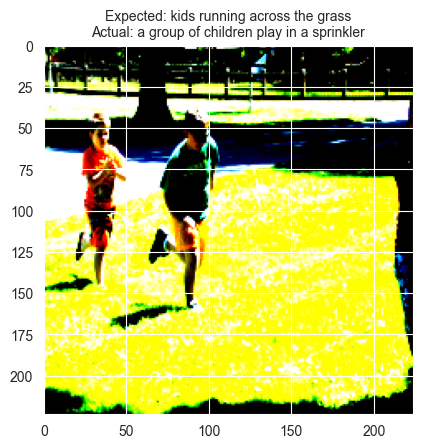

In [88]:
show_inference_result(model, val_dataloader.dataset, 455)

batch_size=1


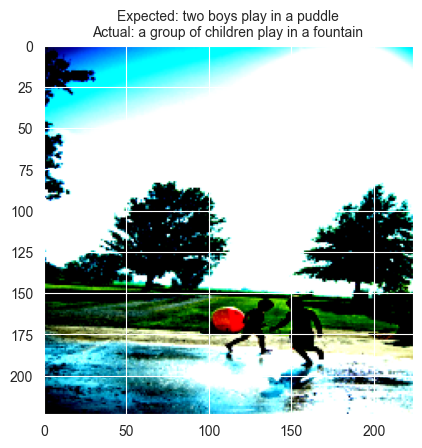

In [78]:
show_inference_result(model, val_dataloader.dataset, 42)

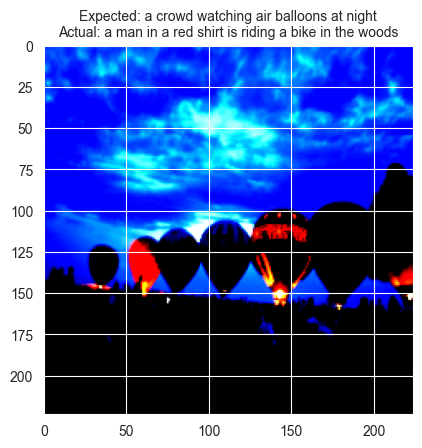

In [89]:
show_inference_result(model, val_dataloader.dataset, 55)

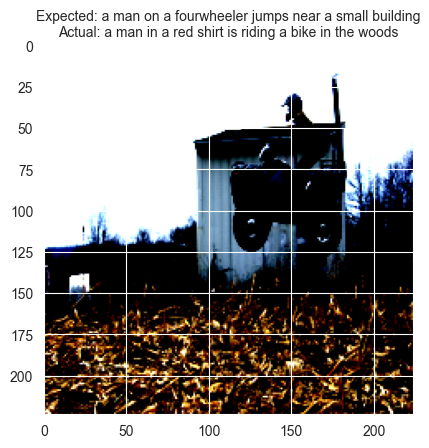

In [90]:
show_inference_result(model, val_dataloader.dataset, 111)

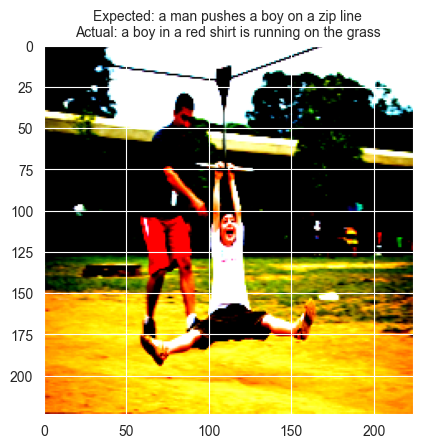

In [91]:
show_inference_result(model, val_dataloader.dataset, 888)

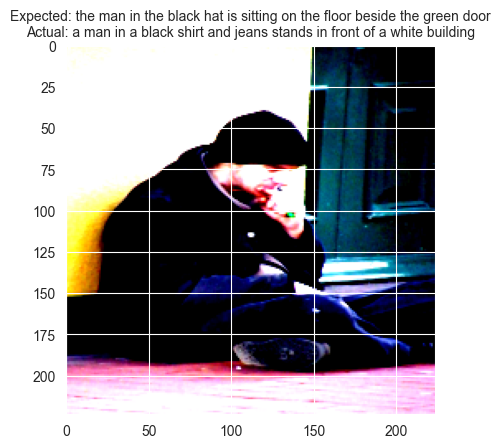

In [92]:
show_inference_result(model, val_dataloader.dataset, 1234)

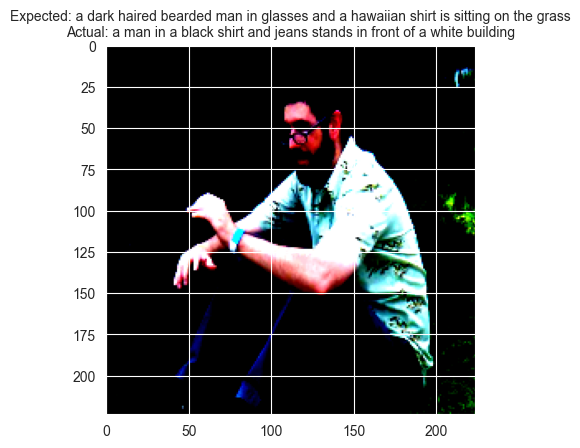

In [93]:
show_inference_result(model, val_dataloader.dataset, 2000)

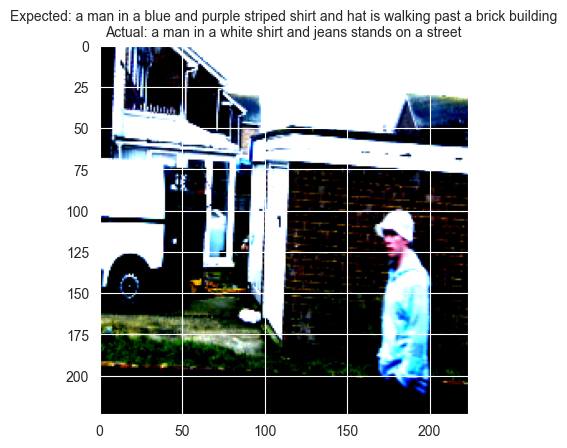

In [94]:
show_inference_result(model, val_dataloader.dataset, 1421)

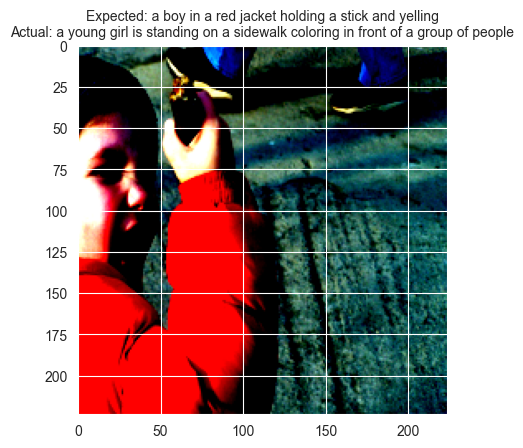

In [95]:
show_inference_result(model, val_dataloader.dataset, 1500)

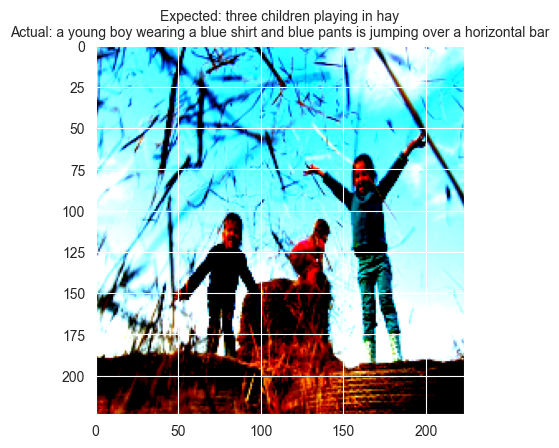

In [96]:
show_inference_result(model, val_dataloader.dataset, 610)